In [ ]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

In [ ]:
# Position Control Torque Update 

In [2]:
!pip install JSAnimation

In [ ]:
# Z control - TODO: modify for a ROD I = 1/12ML^2?

In [ ]:
import time
import numpy as np

'''
Free-Fall Position Update
'''
z_positions = []
time_intervals = []
delta_t = .005 # in seconds 
g = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, -9.81]))
t = 0
run_time  = 3

# initial values 
pose = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0]))
d_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0])) # velocity 
dd_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, g])) # acceleration

# target
target = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 5.0]))  # 5 meters 
accumulated_pos_error = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0]))

# control parameters

# best so far 
kp = 10
kd = 5
ki = .1

# Experimented with these values : 
# kp = kd = ki = 1 does not converge at all !
# kp = 10 and kd = 1 and ki = 0 converges slowly # 7 seconds 


# iterate through this while loop until desired 
# target velocity is reached 
z_positions.append(pose[2])
time_intervals.append((t))
while t < run_time :
    # simulating the object hitting / going back to the ground 
    if pose[2] <= 0 :
        pose[2] = 0
        d_pose_dt = 0
        
        
    print(pose)
   
    # error from desired location in z direction
    accumulated_pos_error += (target - pose)
    
    # PD control for acceleration in z - direction : 
    dd_pose_dt = kp * (target - pose) + kd * (-d_pose_dt) + ki * (accumulated_pos_error)
    u_input = dd_pose_dt + -g
    
    # update predicted current z-direction velocity of object (initially 0) : 
    d_pose_dt = d_pose_dt + u_input * delta_t
    
    # update current position : 
    pose = pose + d_pose_dt  
     
    
    t = t + delta_t
    z_positions.append(pose[2])
    time_intervals.append((t))
    # time.sleep(delta_t) # in seconds
    

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# print("Time (delta_t=0.5) : ", time_intervals)
# print("Z positon at time t: ",z_positions)

plt.title('Time vs. Z-position')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('Z positon at time t: ')

plt.plot(time_intervals, z_positions)

plt.show()

In [ ]:
# X Control 

In [ ]:
# TODO : Need to implement 

In [ ]:
# Orientation Control 

<ipython-input-122-4339cb029ec2>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dd_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, g])) # acceleration


[0. 0. 0.]
[0.      0.      0.30155]
[0.         0.         0.88438298]
[0.         0.         1.71438301]
[0.         0.         2.74551374]
[0.         0.         3.92231759]
[0.        0.        5.1828514]
[0.         0.         6.46190379]
[0.         0.         7.69432823]
[0.         0.         8.81832204]
[0.         0.         9.77848712]
[ 0.          0.         10.52852169]
[ 0.          0.         11.03341304]
[ 0.          0.         11.27102847]
[ 0.          0.         11.23303358]
[ 0.          0.         10.92510187]
[ 0.          0.         10.36641579]
[0.         0.         9.58849529]
[0.         0.         8.63342302]
[0.         0.         7.55156467]
[0.         0.         6.39890702]
[0.         0.         5.23415349]
[0.         0.         4.11572708]
[0.         0.         3.09883306]
[0.         0.         2.23272841]
[0.         0.         1.55833226]
[0.         0.         1.10629254]
[0.         0.         0.89559919]
[0.        0.        0.9328054]
[0.   

[0.         0.         4.27410512]
[0.         0.         4.37276064]
[0.         0.         4.50548261]
[0.         0.         4.66503052]
[0.         0.         4.84292383]
[0.         0.         5.02988776]
[0.         0.         5.21633241]
[0.         0.         5.39284036]
[0.         0.         5.55063822]
[0.         0.         5.68202852]
[0.         0.         5.78076093]
[0.         0.         5.84232488]
[0.         0.         5.86415024]
[0.         0.         5.84570712]
[0.         0.         5.78850153]
[0.         0.         5.69596858]
[0.        0.        5.5732701]
[0.         0.         5.42700852]
[0.        0.        5.2648725]
[0.         0.         5.09523325]
[0.         0.         4.92671272]
[0.         0.         4.76774559]
[0.         0.         4.62615752]
[0.         0.         4.50878036]
[0.         0.         4.42112329]
[0.         0.         4.36711562]
[0.         0.         4.34893293]
[0.         0.         4.36691426]
[0.       0.       4.41957

[0.         0.         5.09327029]
[0.         0.         5.08446742]
[0.         0.         5.07176198]
[0.         0.         5.05585092]
[0.         0.         5.03758202]
[0.         0.         5.01790887]
[0.         0.         4.99784129]
[0.         0.         4.97839359]
[0.         0.         4.96053346]
[0.         0.         4.94513395]
[0.         0.         4.93293097]
[0.         0.         4.92448826]
[0.         0.         4.92017173]
[0.         0.         4.92013396]
[0.        0.        4.9243098]
[0.         0.         4.93242296]
[0.         0.         4.94400315]
[0.         0.         4.95841266]
[0.        0.        4.9748811]
[0.         0.         4.99254612]
[0.         0.         5.01049828]
[0.         0.         5.02782755]
[0.         0.         5.04366913]
[0.         0.         5.05724629]
[0.         0.         5.06790816]
[0.         0.         5.07516058]
[0.         0.         5.07868858]
[0.         0.         5.07836953]
[0.         0.         5.0

ValueError: x and y must have same first dimension, but have shapes (601,) and (602,)

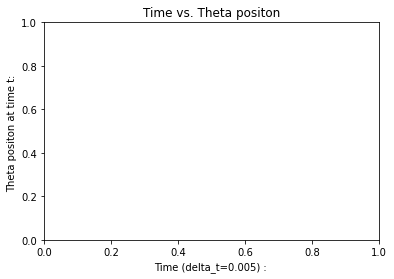

In [122]:
import time
import numpy as np


theta_positions = []
time_intervals = []
delta_t = .005 # in seconds 
g = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, -9.81]))
t = 0
run_time  = 2

# thetha - initial values 
theta = 0.0
d_theta_dt = 0.0 # angular velocity 
dd_theta_dt = 0.0 # angular acceleration


# thetha - target
target = np.pi/4  
accumulated_pos_error = 0
# control parameters

# best so far 
kp = 5
kd = 5
ki = 0  


# iterate through this while loop until desired 
# target velocity is reached 
theta_positions.append(theta)
time_intervals.append((t))




# z conntrol
z_positions = []
time_intervals = []
delta_t = .005 # in seconds 
g = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, -9.81]))
t = 0
run_time  = 3

# initial values 
pose = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0]))
d_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0])) # velocity 
dd_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, g])) # acceleration

# target
target = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 5.0]))  # 5 meters 
accumulated_pos_error = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0]))

# control parameters

# best so far 
kp = 10
kd = 5
ki = .1



while t < run_time :
    
     # simulating the object hitting / going back to the ground 
    if pose[2] <= 0 :
        pose[2] = 0
        d_pose_dt = 0
        
        
    print(pose)
   
    # error from desired location in z direction
    accumulated_pos_error += (target - pose)
    
    # PD control for acceleration in z - direction : 
    dd_pose_dt = kp * (target - pose) + kd * (-d_pose_dt) + ki * (accumulated_pos_error)
    u_input = dd_pose_dt + -g
    
    # update predicted current z-direction velocity of object (initially 0) : 
    d_pose_dt = d_pose_dt + u_input * delta_t
    
    # update current position : 
    pose = pose + d_pose_dt  
    
   
    
    
    
        
  
    # PD control for acceleration in z - direction : 
    dd_theta_dt = kp * (target - theta) + kd * (-d_theta_dt) + ki * (accumulated_pos_error)
   
    
    # TODO: may need to use sin, cos to model the turn 
    # TODO: will have to factor in length not just orientation equation
    # TODO: need to watch youtube video on this 
    
    # update predicted current z-direction velocity of object (initially 0) : 
    d_theta_dt  = d_theta_dt + dd_theta_dt * delta_t
    
    # update current position : 
    theta = theta + d_theta_dt 
    
    t = t + delta_t
    
    # print(theta)
    theta_positions.append(theta)
    time_intervals.append(t)
    # time.sleep(delta_t) # in seconds
    

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# print("Time (delta_t=0.5) : ", time_intervals)
# print("Z positon at time t: ",z_positions)

plt.title('Time vs. Theta positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('Theta positon at time t: ')

plt.plot(time_intervals, theta_positions)

plt.show()


plt.title('X vs. Y Positon')
plt.xlabel('X Value')
plt.ylabel('Y Value')

theta_positions2 = ((np.pi) + np.asarray(theta_positions)).tolist()
[x2, x1] = [np.cos(theta_positions2).tolist(), np.cos(theta_positions).tolist()]
[y2,y1] = [np.sin(theta_positions2).tolist(), np.sin(theta_positions).tolist()]
z = np.asarray(z_positions)


'''
for i in range(0,len(x1)) : 
    print("x1,y1", x1[i],y1[i])
    print("x2,y2", x2[i],y2[i])
    print("z: ", z[i])

'''





# parameterize with s or t ? 
plt.plot([x1,y1])

plt.show()

IndexError: index 100 is out of bounds for axis 0 with size 100

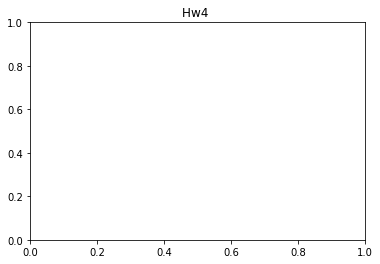

In [117]:

# reference - for 3d plots https://stackoverflow.com/questions/27567001/3d-plot-with-matplotlib

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import numpy

import scipy.integrate as integrate
import matplotlib.animation as animation


         
from JSAnimation import IPython_display    
from IPython.display import HTML

from matplotlib import pyplot as plt
from scipy.linalg import norm



# height 
#x1,y1 1.0 0.0
#x2,y2 -1.0 1.2246467991473532e-16
h =1
#axis and radius
p0 = np.array([-1, 0, 0]) #point at one end
p1 = np.array([1, 0, 0]) #point at other end
R = .06


fig = plt.figure() 
ax=fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-1.1, 5.1), ylim=(-1.1,5.1), zlim=(-1.1, 5.1))


line, =  ax.plot(0, 0)



      
def animate(i):
    

 
    ax.clear()
    line, =  ax.plot(0, 0)
    
    ax.set_xlabel('X')
    ax.set_xlim(-5, 5)
    ax.set_ylabel('Y')
    ax.set_ylim(-5, 5)
    ax.set_zlabel('Z')
    ax.set_zlim(0, 5)

    plt.title('Hw4 ')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")



    # ax=fig.add_subplot(111, projection='3d', autoscale_on=False)

    #p0 = np.array([-1, 0, 0]) #point at one end
    #p1 = np.array([1, 0, 0]) #point at other end

    p0 = np.array([x1[1], y1[i], z[i]]) #point at one end
    p1 = np.array([x2[1], y2[i], z[i]]) #point at other end
    
    
    #vector in direction of axis
    v = p1 - p0

    #find magnitude of vector
    mag = norm(v)

    #unit vector in direction of axis
    v = v / mag

    #make some vector not in the same direction as v
    not_v = np.array([1, 0, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])

    #make vector perpendicular to v
    n1 = np.cross(v, not_v)
    #normalize n1
    n1 /= norm(n1)

    #make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)

    #surface ranges over t from 0 to length of axis and 0 to 2*pi
    t = np.linspace(0, mag, 2)
    theta = np.linspace(0, 2 * np.pi, 100)
    rsample = np.linspace(0, R, 2)

    #use meshgrid to make 2d arrays
    t, theta2 = np.meshgrid(t, theta)

    rsample,theta = np.meshgrid(rsample, theta)



    #generate coordinates for surface
    # "Tube"
    X, Y, Z = [p0[i] + v[i] * t + R * np.sin(theta2) * n1[i] + R * np.cos(theta2) *       n2[i] for i in [0, 1, 2]]
    # "Bottom"
    X2, Y2, Z2 = [p0[i] + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    # "Top"
    X3, Y3, Z3 = [p0[i] + v[i]*mag + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]



    
    ax.plot_surface(X, Y, Z, color='blue')
    ax.plot_surface(X2, Y2, Z2, color='blue')
    ax.plot_surface(X3, Y3, Z3, color='blue')
    #fig.clear(True)
    #ax.clear() 
    plt.close(fig)
    


    """perform animation step"""
    # line.set_data(([x1[i], x2[i]],[y1[i],y2[i]] ))
    #ax.plot_surface(x1, y1, numpy.array([x2, x1]))
    return line

# choose the interval based on dt and the time to animate one step
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * delta_t - (t1 - t0)




animation = animation.FuncAnimation(fig, animate, frames=300,
                              interval=interval)

# plt.show()
HTML(animation.to_jshtml())

# plotting a plane / surface
# https://stackoverflow.com/questions/36060933/matplotlib-plot-a-plane-and-points-in-3d-simultaneously
# 

# TODO: I am able to graph a three D object , next want to move it in 3D like the 2D version but with width 
# Then implement the z, x, and theta control 
